# Chess move image recognition

Create a convolutional neural network (CNN) to create a binary image classifier that can recognise whether it is black to move or white to move.

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Label and load datasets

In [9]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("./data-train/",
                                          target_size=(200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
validation_dataset = test.flow_from_directory("./data-validation/",
                                          target_size=(200,200),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1163 images belonging to 2 classes.
Found 317 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'black-move': 0, 'white-move': 1}

## Define CNN model layers

In [11]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 128)      

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#steps_per_epoch = train_imagesize/batch_size

history = model.fit(train_dataset,
         steps_per_epoch = 36,
         epochs = 24,
         validation_data = validation_dataset
       
         )

Epoch 1/24
36/36 [==============================] - 23s 626ms/step - loss: 0.7210 - accuracy: 0.5287 - val_loss: 0.6867 - val_accuracy: 0.6593
Epoch 2/24
36/36 [==============================] - 23s 641ms/step - loss: 0.6449 - accuracy: 0.6163 - val_loss: 0.8642 - val_accuracy: 0.5110
Epoch 3/24
36/36 [==============================] - 37s 1s/step - loss: 0.5216 - accuracy: 0.7560 - val_loss: 0.8455 - val_accuracy: 0.6341
Epoch 4/24
36/36 [==============================] - 42s 1s/step - loss: 0.4051 - accuracy: 0.7993 - val_loss: 0.6232 - val_accuracy: 0.7571
Epoch 5/24
36/36 [==============================] - 41s 1s/step - loss: 0.1960 - accuracy: 0.9248 - val_loss: 1.0032 - val_accuracy: 0.7445
Epoch 6/24
36/36 [==============================] - 38s 1s/step - loss: 0.2299 - accuracy: 0.9151 - val_loss: 0.6008 - val_accuracy: 0.7823
Epoch 7/24
36/36 [==============================] - 36s 1s/step - loss: 0.1784 - accuracy: 0.9363 - val_loss: 0.5881 - val_accuracy: 0.7792
Epoch 8/24
36/

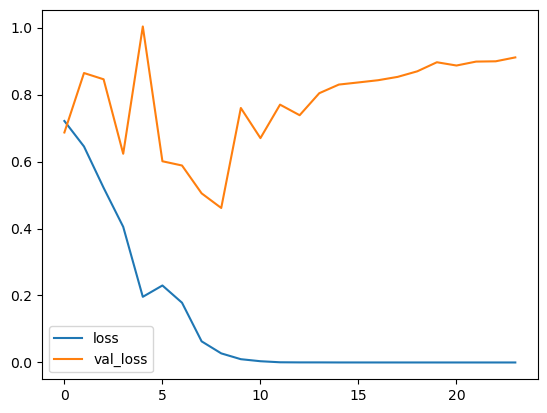

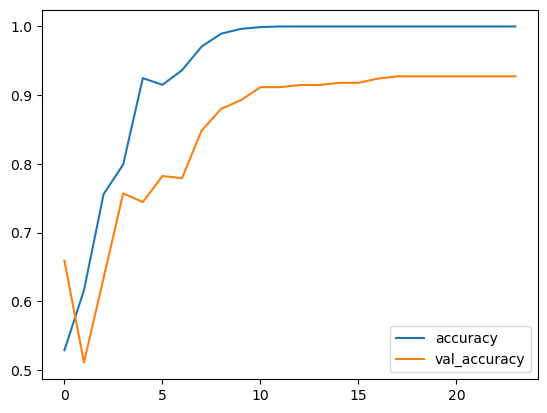

In [15]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [17]:
# test the black move images

black_correct = 0

for file in os.listdir('./data-test/black-move'):
    path = './data-test/black-move/' + file
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    val = model.predict(x)
    print(val)
    if val == 0:
        black_correct += 1

print(f'The number of correct pictures is {black_correct} out of {len(os.listdir("./data-test/black-move"))}')
print(f'Accuracy for BLACK move prediciton {black_correct / len(os.listdir("./data-test/black-move"))*100}%')

1/1 [==============================] - 0s 72ms/step
[[0.]]
1/1 [==============================] - 0s 21ms/step
[[0.]]
1/1 [==============================] - 0s 22ms/step
[[0.]]
1/1 [==============================] - 0s 22ms/step
[[0.]]
1/1 [==============================] - 0s 24ms/step
[[0.]]
1/1 [==============================] - 0s 23ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
The number of correct pictures is 7 out of 7
Accuracy for BLACK move prediciton 100.0%


In [18]:
# test the black move images

white_correct = 0

for file in os.listdir('./data-test/white-move'):
    path = './data-test/white-move/' + file
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    val = model.predict(x)
    print(val)
    if val == 1:
        white_correct += 1

print(f'The number of correct pictures is {white_correct} out of {len(os.listdir("./data-test/white-move"))}')
print(f'Accuracy for WHITE move prediciton {white_correct / len(os.listdir("./data-test/white-move"))*100}%')

1/1 [==============================] - 0s 23ms/step
[[1.]]
1/1 [==============================] - 0s 24ms/step
[[1.]]
1/1 [==============================] - 0s 24ms/step
[[1.]]
1/1 [==============================] - 0s 22ms/step
[[1.]]
1/1 [==============================] - 0s 22ms/step
[[1.]]
1/1 [==============================] - 0s 20ms/step
[[1.]]
1/1 [==============================] - 0s 22ms/step
[[1.]]
1/1 [==============================] - 0s 23ms/step
[[1.]]
The number of correct pictures is 8 out of 8
Accuracy for WHITE move prediciton 100.0%


1/1 [==============================] - 0s 17ms/step
[[0.]]


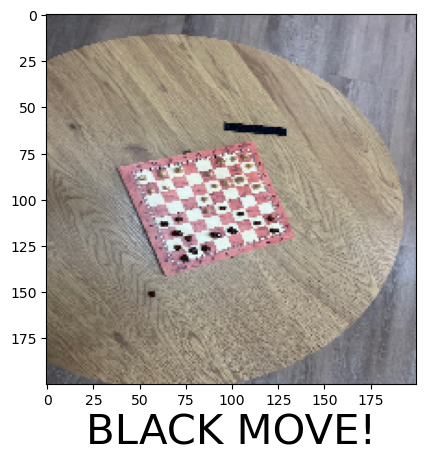

In [22]:
# manually run image test
def predict_move(filename):
    img = image.load_img(filename,target_size=(200, 200))    
    plt.imshow(img)
 
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    
    if val == 1:      
        plt.xlabel("WHITE MOVE!",fontsize=30)
    elif val == 0:
        plt.xlabel("BLACK MOVE!",fontsize=30)

predict_move("./data-test/black-move/5.jpeg")